In [1]:
#!pip install missingnoimport warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.float_format', lambda x: '%.2f' % x)


from sklearn.linear_model import LinearRegression,LogisticRegression,RidgeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn import preprocessing , model_selection , tree , metrics
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Import Classification Report function
from sklearn.metrics import classification_report

df_= pd.read_csv("C:/Users/212804380/PycharmProjects/pythonProject1/Medical Cost/insurance.csv")
df = df_.copy()

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

#statistical summary
df.describe().T

##################### Shape #####################
(1338, 7)
##################### Types #####################
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
##################### Head #####################
   age     sex   bmi  children smoker     region  charges
0   19  female 27.90         0    yes  southwest 16884.92
1   18    male 33.77         1     no  southeast  1725.55
2   28    male 33.00         3     no  southeast  4449.46
3   33    male 22.70         0     no  northwest 21984.47
4   32    male 28.88         0     no  northwest  3866.86
##################### Tail #####################
      age     sex   bmi  children smoker     region  charges
1333   50    male 30.97         3     no  northwest 10600.55
1334   18  female 31.92         0     no  northeast  2205.98
1335   18  female 36.85         0     no  southeast  1629.83
1336   21  female 25.80         0     no  sout

,count,mean,std,min,25%,50%,75%,max
age,1338.00,39.21,14.05,18.00,27.00,39.00,51.00,64.00
bmi,1338.00,30.66,6.10,15.96,26.30,30.40,34.69,53.13
children,1338.00,1.09,1.21,0.00,0.00,1.00,2.00,5.00
charges,1338.00,13270.42,12110.01,1121.87,4740.29,9382.03,16639.91,63770.43


In [2]:
# Number of unique observations in variables
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

<AxesSubplot:xlabel='bmi', ylabel='Count'>

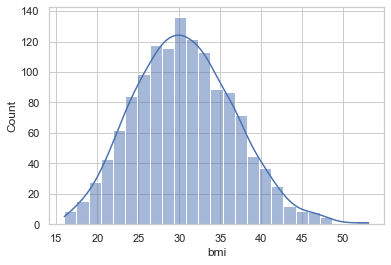

In [3]:
# Distribution of bmi
sns.set(style='whitegrid')
sns.histplot(data=df, x="bmi", kde=True)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

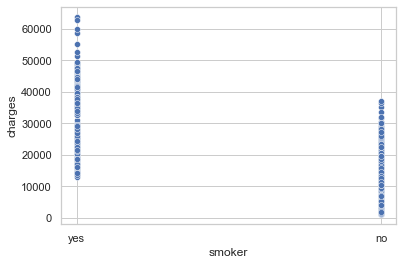

In [4]:
# Relationship between "smoker" and "charges"
sns.scatterplot(x ="smoker" , y="charges", data=df, palette="Paired")

#YORUM:Yayılım graifiğine göre sigara içenlerin charges tutarı daha fazla

<AxesSubplot:xlabel='region', ylabel='count'>

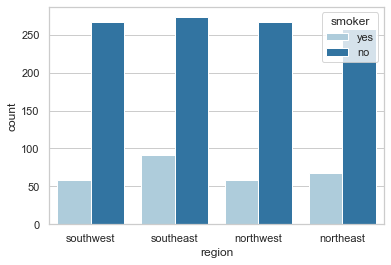

In [5]:
sns.countplot(x="region", hue="smoker", data=df, palette="Paired")

#YORUM:
    #Sigara içenlerin ve içmeyenlerin en çok olduğu bölge: southeast
    #Sigara içenlerin az olduğu bölge: northwest
    #Sigara içmeyenlerin az olduğu bölge: northeast

<AxesSubplot:xlabel='region', ylabel='bmi'>

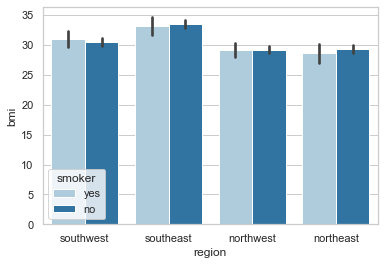

In [6]:
# Relations between "region", "smoker" and "bmi"
sns.barplot(x = "region", y = "bmi", hue = "smoker", data=df, palette="Paired")



#YORUM:
    #Bölge bazında sigara içen ve içmeyenler arasında bmi bazında belirgin bir fark yok, birbirine çok yakın.
    #en yüksek bmi, sigara içenlerde ve içmeyenlerde: southeast

<AxesSubplot:xlabel='sex', ylabel='bmi'>

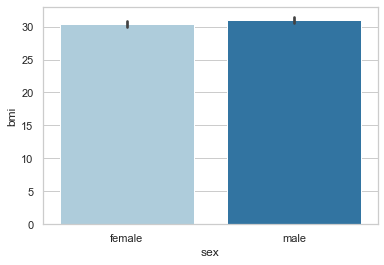

In [7]:
sns.barplot(x="sex", y="bmi", data=df, palette="Paired")

#YORUM:Cinsiyet bazında bmi değerleri çok yakın olup erkeklerin bmi ortalaması daha fazladır.

<AxesSubplot:xlabel='age', ylabel='bmi'>

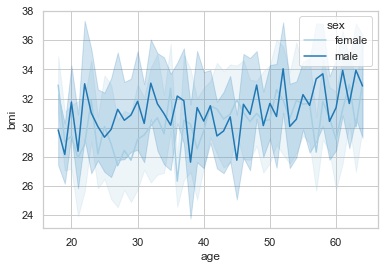

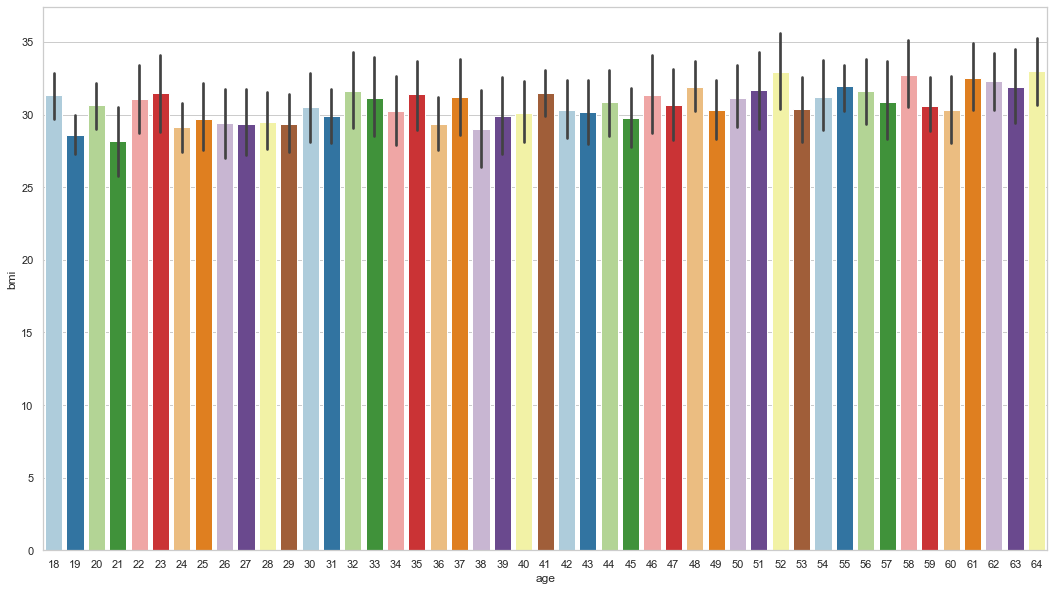

In [8]:
# Relation between "age" and "bmi"
sns.lineplot(x="age", y="bmi", hue="sex", data=df, palette="Paired") 

plt.figure(figsize=(18,10))
sns.barplot(x="age", y="bmi", data=df, palette="Paired") 

#YORUM: yaşlara göre bmi bazında belirgin bir farklılılık yoktur.Yaşlandıkça bmi artışı gözlenmiştir.

<AxesSubplot:xlabel='children', ylabel='bmi'>

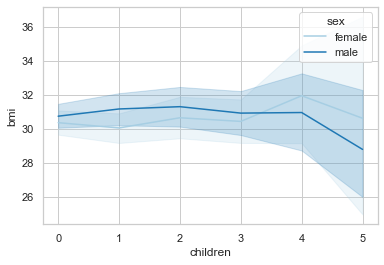

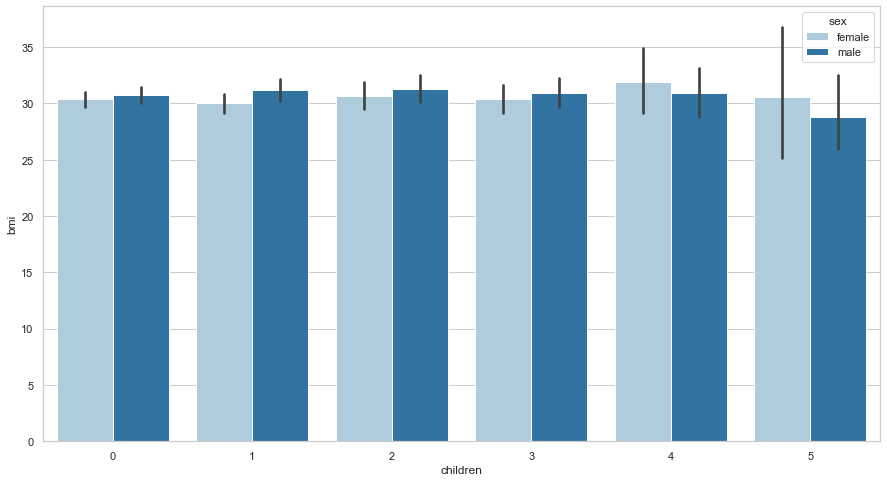

In [9]:
# Relation between "bmi" and "children"
sns.lineplot(x="children", y="bmi", hue="sex", data=df, palette="Paired") 

plt.figure(figsize=(15,8))
sns.barplot(x="children", y="bmi", hue="sex",data=df, palette="Paired") 

#YORUM: çocuk sayısı arttıkça erkeklerdeki bmi değeri düşmüş.

<AxesSubplot:xlabel='charges', ylabel='bmi'>

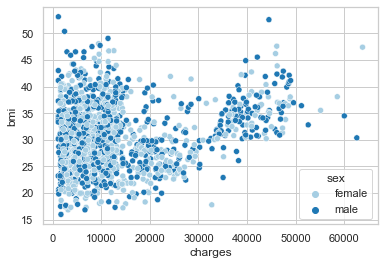

In [10]:
# Relations between "bmi" and "charges"
sns.scatterplot(x = "charges", y="bmi", hue="sex", data=df, palette="Paired")

#YORUM:charges bazında yoğunluk 0-20000 arasında iken özellkle bmi değeri 30-40 arasında olanların charges tutarlarında 30000-50000 arasında gruplaşma var.

<AxesSubplot:>

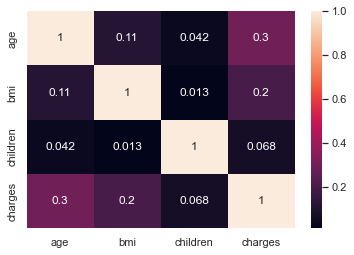

In [11]:
sns.heatmap(df.corr(), annot = True)

In [12]:
# Children count based on region
children_count = df.groupby("region")["children"].sum()
children_count.sort_values()

#YORUM:
    #en yüksek çocuk sayısına sahip bölge:southeast
    #en düşük çocuk sayısına sahip bölge:northeast

region
northeast    339
southwest    371
northwest    373
southeast    382
Name: children, dtype: int64

In [13]:
# Find the lower and upper limits as Q1 – 1.5 IQR and Q3 + 1.5 IQR, respectively
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

outlier_thresholds(df, "bmi")


(13.7, 47.290000000000006)

In [14]:

low, up = outlier_thresholds(df, "bmi")
df[(df["bmi"] < low) | (df["bmi"] > up)].head()






,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.33
286,46,female,48.07,2,no,northeast,9432.93
401,47,male,47.52,1,no,southeast,8083.92
543,54,female,47.41,0,yes,southeast,63770.43
847,23,male,50.38,1,no,southeast,2438.06


In [15]:
df[(df["bmi"] < low) | (df["bmi"] > up)].index

Int64Index([116, 286, 401, 543, 847, 860, 1047, 1088, 1317], dtype='int64')

In [16]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

check_outlier(df, "bmi")


#YORUM: bmi değişkeninde outlier bulnumaktadır.

True

In [17]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [18]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [19]:
#Print X
print(df)

      age  sex   bmi  children  smoker  region  charges
0      19    0 27.90         0       1       3 16884.92
1      18    1 33.77         1       0       2  1725.55
2      28    1 33.00         3       0       2  4449.46
3      33    1 22.70         0       0       1 21984.47
4      32    1 28.88         0       0       1  3866.86
...   ...  ...   ...       ...     ...     ...      ...
1333   50    1 30.97         3       0       1 10600.55
1334   18    0 31.92         0       0       0  2205.98
1335   18    0 36.85         0       0       2  1629.83
1336   21    0 25.80         0       0       3  2007.94
1337   61    0 29.07         0       1       1 29141.36

[1338 rows x 7 columns]


In [20]:
X = df.drop(['charges'], axis = 1)
y = df['charges']

In [21]:
# Split the dataset into train and test sets with 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [22]:
# Lineer Regression
linear_regression_model=LinearRegression()

# Train the model
linear_regression_model.fit(X_train,y_train)

# Make prediction using the test dataset on Logistic Classifier model
linear_pred=linear_regression_model.predict(X_test)

print(linear_pred)


[ 2.99885554e+04  4.01528746e+04  2.96326391e+04  2.71597882e+03
  1.60910851e+04  1.21355027e+04  4.45565735e+03  1.39895659e+04
  3.65849904e+04  3.13830894e+04  7.58605081e+03  4.90662431e+03
  6.69562445e+03  2.22181986e+03  9.83185847e+03  5.33384257e+03
  3.68520458e+04  1.65136885e+01  1.86052431e+03  2.73824151e+03
  1.05187790e+04  7.91167064e+03  1.14771405e+04  1.36897697e+04
  7.97745288e+03  1.05730058e+04  3.63219889e+03  1.45402414e+04
  2.26600515e+03  5.52586502e+03 -3.34676375e+02  5.67137136e+03
  3.49092226e+04  3.37472837e+04  7.27479949e+03  6.14803362e+03
  4.16817881e+03  5.31292652e+03  5.43961946e+03  1.31303664e+04
  5.99268233e+03  8.08899054e+03  1.93812415e+02  1.30514103e+04
  7.56329831e+03  2.64862184e+04  1.55047874e+04  1.54369694e+04
  1.18221704e+04  8.60892200e+03  8.75382717e+02  7.44653980e+03
  8.36319016e+03  1.05751044e+04  4.11104621e+04  3.64404167e+04
  1.04605850e+04  3.29098913e+03  1.37461914e+04 -1.31524385e+03
  1.16405028e+04  1.23113

In [23]:
#Score of Linear Regression
print (f'MSE: {metrics.mean_squared_error(y_test , linear_pred)}')

print (f'MAE: {metrics.mean_absolute_error(y_test , linear_pred)}')

print (f'r2_score: {metrics.r2_score(y_test , linear_pred)}')

print (f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test , linear_pred))}')



MSE: 41015264.55653918
MAE: 4333.3906114190995
r2_score: 0.7106725307447157
RMSE: 6404.316088118948


In [24]:
test_residual= y_test - linear_pred

In [25]:
pd.DataFrame({'Actual': y_test, 'Predicted': linear_pred, 'diff':(abs(y_test-linear_pred))})

,Actual,Predicted,diff
803,38792.69,29988.56,8804.13
55,47496.49,40152.87,7343.62
373,36085.22,29632.64,6452.58
508,3044.21,2715.98,328.23
36,15612.19,16091.09,478.89
...,...,...,...
724,10106.13,10569.66,463.52
1243,3171.61,5462.67,2291.05
31,2198.19,1474.32,723.87
939,9487.64,10918.76,1431.11


In [26]:
#Ridge Regression
from sklearn.linear_model import Ridge
Ridge= Ridge(alpha=1)
Ridge.fit(X_train, y_train)
print("Intercept: ",Ridge.intercept_)
print("Coefficient: ",Ridge.coef_)
print("Score: ",Ridge.score(X_test, y_test))

Intercept:  -11654.011529865978
Coefficient:  [  262.59574144    58.31250553   320.27212783   444.65172425
 24089.27424293  -406.75090852]
Score:  0.7113095496798512


In [27]:
# Hyper-Parameter Optimization:Gridsearch - Ridge
alpha = [0.0001,0.05,0.10,0.25 , 0.5,0.75, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid2 = GridSearchCV(estimator = Ridge, param_grid=param_grid, scoring='r2', verbose=1, cv=10,n_jobs=-1)
grid2_result = grid2.fit(X_train, y_train)
print('Best Score: ', grid2_result.best_score_)
print('Best Params: ', grid2_result.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score:  0.7500612568223696
Best Params:  {'alpha': 1}
